## Introduction
This is the code for INT304: Pattern Recognition in Computer Vision Spring 2022/23  - ASSESSMENT 1: Feature Extraction. You should follow the brief and complete code.
The part you need to fill in the code looks like this:

In [1]:
#############################################################################
# YOU NEED FILL THIS PART

# Here are the comments of what you should do 

#############################################################################

# 0. Data loading

- a. Collect dataset: Collect a representative set of facial images.
- b1. Vectorize: Convert all images to vectors by grouping the grayscale values of each pixel into a vector

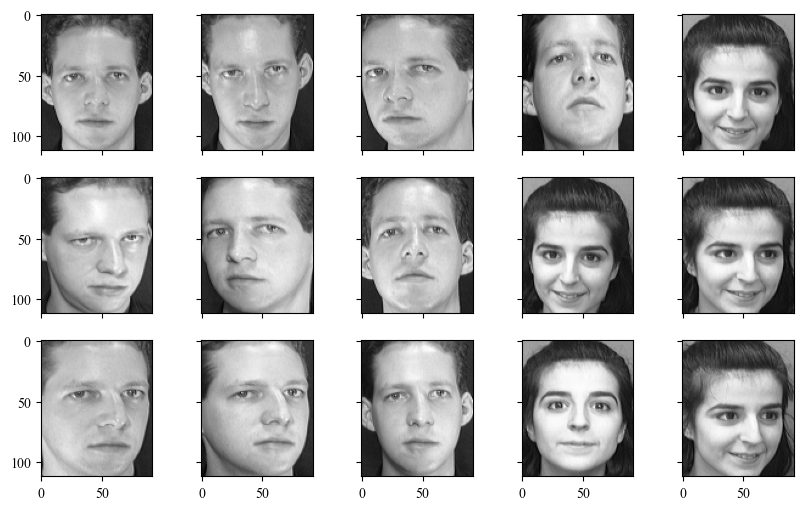

Face image shape: (112, 92)
Number of classes: 40
Number of images: 400


In [1]:
# import all libs
import zipfile
import cv2
import numpy as np
import matplotlib.pyplot as plt
plt.rc('font',family='Times New Roman') 

# we set the random seed here to make the results reproducible
np.random.seed(42)

def visualize(imgs, reshape=False, faceshape=[112,92]):
    # Show sample faces using matplotlib
    row = len(imgs) // 5
    fig, axes = plt.subplots(row, 5,sharex=True,sharey=True,figsize=(10, row*2))
    for i in range(len(imgs)):
        if reshape:
            img_ = imgs[i].reshape(faceshape)
        else:
            img_ = imgs[i]
        axes[i%row][i//row].imshow(img_, cmap="gray")
    plt.show()

# Read face image from zip file on the fly
faces = {}
with zipfile.ZipFile("attface.zip") as facezip:
    for filename in facezip.namelist():
        if not filename.endswith(".pgm"):
            continue # not a face picture
        with facezip.open(filename) as image:
            # If we extracted files from zip, we can use cv2.imread(filename) instead
            faces[filename] = cv2.imdecode(np.frombuffer(image.read(), np.uint8), cv2.IMREAD_GRAYSCALE)

faceimages = list(faces.values()) # take 15 images
# visualize first 15 images in the dataset
visualize(faceimages[:15], FILE_NAME='original.png')
 
# Print some details
faceshape = list(faces.values())[0].shape
print("Face image shape:", faceshape)
 
classes = set(filename.split("/")[0] for filename in faces.keys())
print("Number of classes:", len(classes))
print("Number of images:", len(faces))

In [3]:
# We have overall 40 classes, each contains about 10 images
# We using an 80/20 split.

facematrix = []
facelabel = []

test_facematrix = []
test_facelabel = []
for key,val in faces.items():
    if ("10.pgm" in key) or ("9.pgm" in key):
        test_facematrix.append(val.flatten())
        test_facelabel.append(key.split("/")[0])
    else:
        facematrix.append(val.flatten())
        facelabel.append(key.split("/")[0])
        
print(f'We train on : {len(facematrix)} samples')

We train on : 320 samples


- b2. Vectorize: combining all pixel vectors into a large matrix X.

In [4]:
#############################################################################
# YOU NEED FILL THIS PART

# Turn facematrix into a NxM matrix with N images and M pixels per image by using np.array()
facematrix = np.asarray(facematrix)
# facematrix = facematrix.reshape(320,112*92)

#############################################################################

- c. Normalize: Center each pixel vector by subtracting the mean of all vectors.

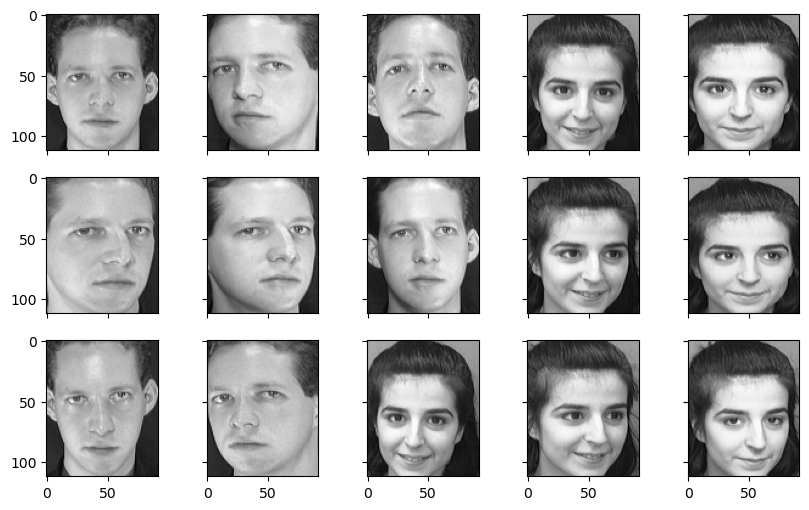

In [5]:
#############################################################################
# YOU NEED FILL THIS PART

# Normalize the vectors(metrix)
mean = np.mean(facematrix, axis=1, keepdims=True)
facematrix = (facematrix - mean)
visualize(facematrix[:15], reshape=True)
#############################################################################

# 1. Apply PCA to the training data with k components (Allowed to use SKlearn class)

 
Conduct PCA includes following steps:
- d. Calculate covariance matrix: Calculate the covariance matrix Σ of the centered matrix X.
- e. Calculate eigenvalues and eigenvectors: Perform an eigenvalue decomposition of the covariance matrix Σ to obtain the eigenvalues and corresponding eigenvectors. Keep the top k eigenvectors with the largest eigenvalues as the base vectors for generating Eigenfaces.
- f. Generate Eigenfaces: Combine the eigenvectors into a new matrix called Eigenfaces. Each row in the matrix corresponds to a specific eigenvector, therefore the number of rows is k and the number of columns is equal to the dimensionality of the pixel vectors.
- g. Calculate facial feature vectors: Project each facial image vector onto the generated Eigenface space. The resulting coordinates vector represents the feature vector of that particular face.

Notice: 

- You are allowed to use SKlearn class for PCA: from sklearn.decomposition import PCA. If so, your code should be very simple. 
- You should try different values of k (tune k) for face recognition.

In [6]:
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsRegressor

#############################################################################
# YOU NEED FILL THIS PART

# Define k
k = 50 # your code here

# define a model named pca which apply PCA and take first k principal components as eigenfaces
pca = PCA(n_components=k)

# Generate eigenfaces. You can directly fetch the k components form Sklearn's PCA: pca.components_
eigenfaces = pca.fit(facematrix).components_
print(eigenfaces.shape)
#############################################################################

neigh = KNeighborsRegressor(n_neighbors=3)

(50, 10304)


# 2. Visualize EigenFaces for 30 Images. Give an appropriate analysis.

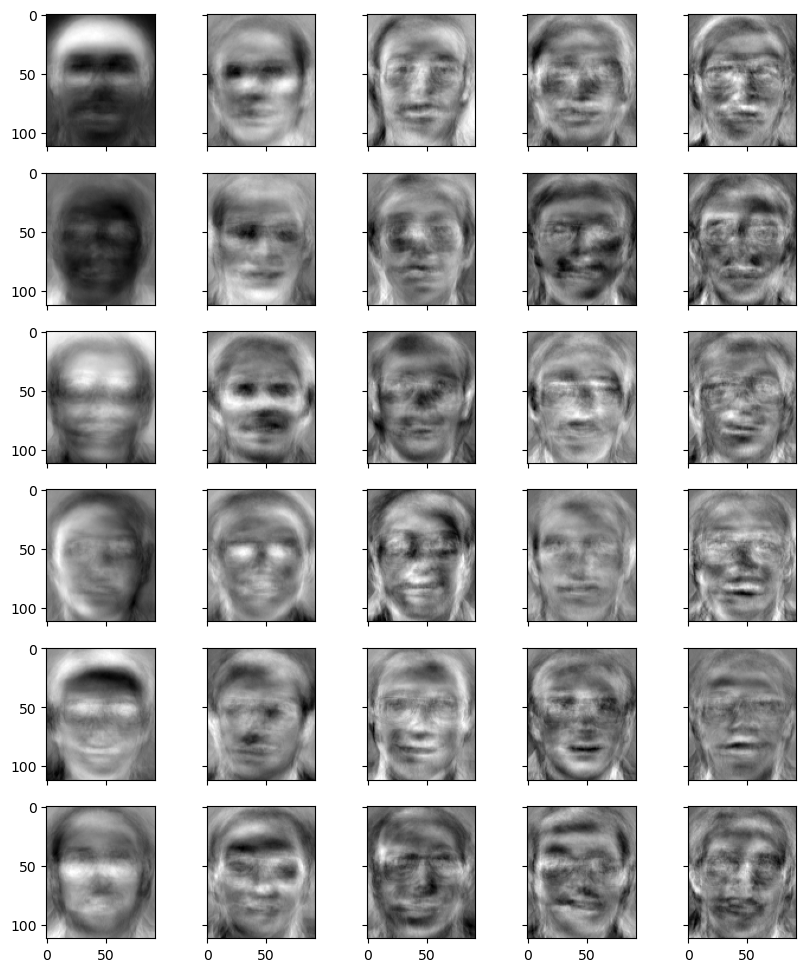

In [7]:
# Visualize eigenfaces
visualize(eigenfaces[:30], True, faceshape=[112,92])

# 3. Generate new faces using eigenfaces with random weight vector. Visualize the mean face and random face. It is required to analyze the experimental results.

In [8]:
#############################################################################
# YOU NEED FILL THIS PART

# Get the mean face. You can directly fetch the means form Sklearn's PCA: pca.mean_
# for Sklearn's PCA, please check: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA
# you may need to reshape your metrix to get the right shape by using: np.array.reshape(faceshape)
mean_face = pca.mean_.reshape(112,92)
# print(mean_face)
# print(mean_face.shape)
# print(type(mean_face))

# Generate weights as a KxN matrix where K is the number of eigenfaces and N the number of samples
# Weights are calculates as:  eigenfaces @ (facematrix - pca_mean).T, where @ is MatrixMultiply
weights = eigenfaces @ (facematrix - pca.mean_).T
# print(weights)
# print(weights.shape)
# print(type(weights))

# sample a random weights form weights' Standard Deviation: use np.random.randn() and np.array().std()
weights_std = np.std(weights, axis=1)
random_weights = np.random.normal(loc=0, scale=weights_std, size=[k,])
# random_weights = np.random.randn(50,)
# print(random_weights.shape)

# calculate the new face, which is defined as: random_weights @ eigenfaces + pca_mean
# you may need to reshape your metrix to get the right shape by using: np.array.reshape(faceshape)
newface = random_weights @ eigenfaces + pca.mean_
newface = newface.reshape(112,92)
#############################################################################

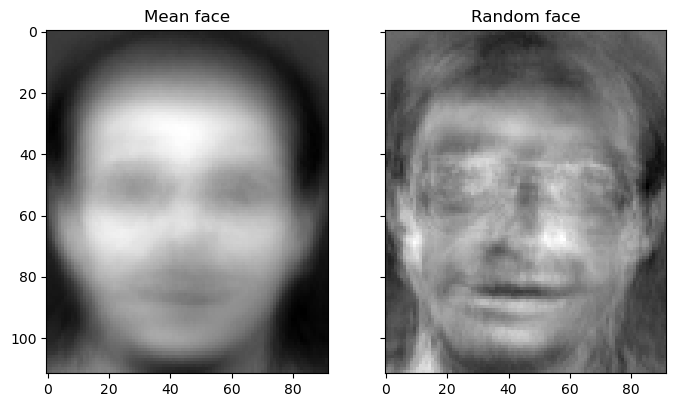

In [9]:
# Visualize the mean face and random face
fig, axes = plt.subplots(1,2,sharex=True,sharey=True,figsize=(8,6))
axes[0].imshow(mean_face, cmap="gray")
axes[0].set_title("Mean face")

axes[1].imshow(newface, cmap="gray")
axes[1].set_title("Random face")
plt.show()

 # 4.  Build a face recognition system by using eigenface. Try to tune different factors and give a reasonable analysis.

- h. Face recognition: Compare the distance between two facial feature vectors. The smaller the distance, the more similar the two faces are, and the better the recognition.
 
Notice: you need to tune k that already defined above for the analysis.


In [10]:
# the face_recon function can find the most similar face image that we trained on for a input image
def face_recon(image_path, eigenfaces, pca_mean, weights, k=3):
    #############################################################################
    # YOU NEED FILL THIS PART
    # We find the input image by the path
    # We define the input image as a query
    query = faces[image_path].reshape(1,-1)
    # Similar to above, we calculate the query weight: eigenfaces @ (query - pca_mean).T
    query_weight = eigenfaces @ (query - pca_mean).T
    
    # We calculate the euclidean distance between weights and query_weight using np.linalg.norm()
    euclidean_distance = np.linalg.norm(weights - query_weight, axis=0)
    
    # We find the minist euclidean distance and its corresponding index is the index of the best match image
    best_match = euclidean_distance.argmin()
    print("Best match %s with Euclidean distance %f" % (facelabel[best_match], euclidean_distance[best_match]))
    #############################################################################
    
    # Visualize
    fig, axes = plt.subplots(1,2,sharex=True,sharey=True,figsize=(8,6))
    axes[0].imshow(query.reshape(faceshape), cmap="gray")
    axes[0].set_title("Query")
    axes[1].imshow(facematrix[best_match].reshape(faceshape), cmap="gray")
    axes[1].set_title("Best match")
    plt.show()

Best match s39 with Euclidean distance 1582.334851


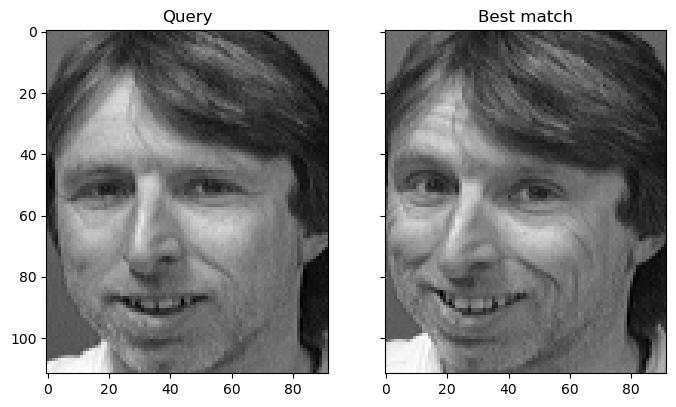

In [11]:
# We then test above face recognition system by using untrained data.
# Notice that our untrained data are the "9.pgm" "10.pgm" in each class
face_recon("s39/10.pgm", eigenfaces, pca.mean_, weights)

Best match s17 with Euclidean distance 0.000000


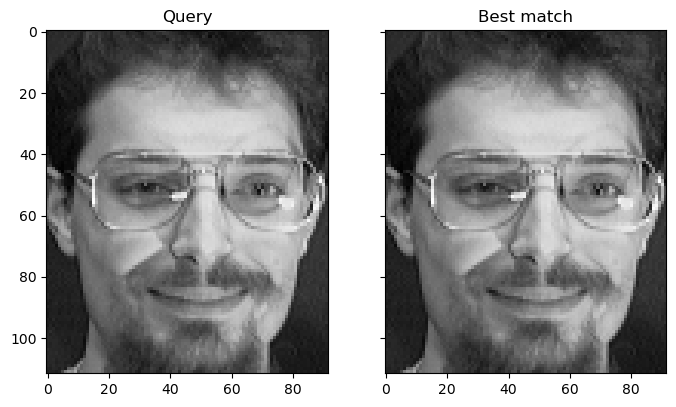

In [12]:
# you can try other untrained data ("9.pgm" "10.pgm" in each class)
face_recon("s17/5.pgm", eigenfaces, pca.mean_, weights)

# Optional part

In [13]:
# We can evaluate our system by testing how many untrained faces can be correctly classified
def evaluation(test_facematrix, test_facelabel, eigenfaces, pca_mean, weights):
    correct_preds = 0
    #############################################################################
    # YOU NEED FILL THIS PART
    for i in range(len(test_facematrix)):
        # similar to above, we define the input image as a query
        query = test_facematrix[i].reshape(1,-1)
        # Similar to above, we calculate the query weight: eigenfaces @ (query - pca_mean).T
        query_weight = eigenfaces @ (query - pca_mean).T
        
        # Similar to above, we calculate the euclidean distance between weights and query_weight using np.linalg.norm()
        euclidean_distance = np.linalg.norm(weights - query_weight, axis=0)
        
        # Similar to above, we find the minist euclidean distance and its corresponding index is the index of the best match image
        best_match = np.argmin(euclidean_distance)
        pred = facelabel[best_match]
        # if the best match label equals to the image's test facelabel, we add one to correct_preds
        if pred == test_facelabel[i]:
            correct_preds +=1
    
    # print(f"Accuracy {round(correct_preds/len(test_facematrix), 2)}")
    return correct_preds/len(test_facematrix)


In [14]:
evaluation(test_facematrix, test_facelabel, eigenfaces, pca.mean_, weights)

0.925

In [15]:
from tqdm import tqdm
accuracy = np.empty((0,1))
k = np.arange(1,321,1)
for i in tqdm(k):
    pca_temp = PCA(n_components=i)
    eigenfaces_temp = pca_temp.fit(facematrix).components_
    mean_face_temp = pca_temp.mean_.reshape(112,92)
    weights_temp = eigenfaces_temp @ (facematrix - pca_temp.mean_).T
    accuracy = np.append(accuracy, evaluation(test_facematrix, test_facelabel, eigenfaces_temp, pca_temp.mean_, weights_temp))

np.savetxt('accuracy.txt', accuracy, fmt='%4f', delimiter =",")

100%|██████████| 320/320 [01:43<00:00,  3.08it/s]


[0.9625, 50]


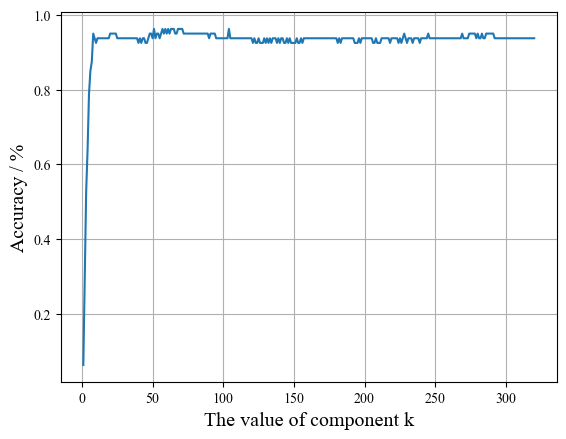

In [10]:
accuracy = np.loadtxt('accuracy.txt', delimiter =",")
acc_max = [np.max(accuracy), np.argmax(accuracy)]
k = np.arange(1,321,1)
plt.figure(facecolor='w',edgecolor='w')
plt.plot(k, accuracy, linestyle = '-', linewidth = '1.5')
plt.xlabel('The value of component k', fontsize='x-large')
plt.ylabel('Accuracy / %', fontsize='x-large')
plt.grid()
plt.savefig('accuracy.png', dpi=600, format='png')
print(acc_max)

In [26]:
new_acc = accuracy[9:]
mean_acc = np.mean(new_acc)
print(mean_acc)

0.9388665594855304
